# Analysis Project On Indian Agriculture

In [1]:
# Importing Our Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Our Dataset and looking the top 5 rows

df = pd.read_csv('India_Agriculture_Crop_Production.csv')
df.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
# looking for the Missing Value

df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [4]:
# Looking for the shape(i.e no of rows and columns) of our dataset

df.shape

(345407, 10)

In [5]:
# Filling the Missing Values

df.fillna({'Crop' : df['Crop'].mode()[0]}, inplace = True)
df.fillna({'Season': df['Season'].mode()[0]}, inplace = True)
df.fillna({'Area': df['Area'].mean()}, inplace = True)
df.fillna({'Yield': df['Yield'].mode()[0]}, inplace = True)
df.fillna({'Production': df['Production'].mean()}, inplace = True)

In [6]:
df.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [7]:
# Looking for the Outlier Present in our dataset

df.describe()

,Area,Production,Yield
count,3.454070e+05,3.454070e+05,345407.000000
mean,1.167019e+04,9.583711e+05,79.400078
std,4.583624e+04,2.137368e+07,916.585276
min,4.000000e-03,0.000000e+00,0.000000
25%,7.400000e+01,9.000000e+01,0.546839
50%,5.320000e+02,7.690000e+02,1.000000
75%,4.114000e+03,8.146000e+03,2.467001
max,8.580100e+06,1.597800e+09,43958.333333


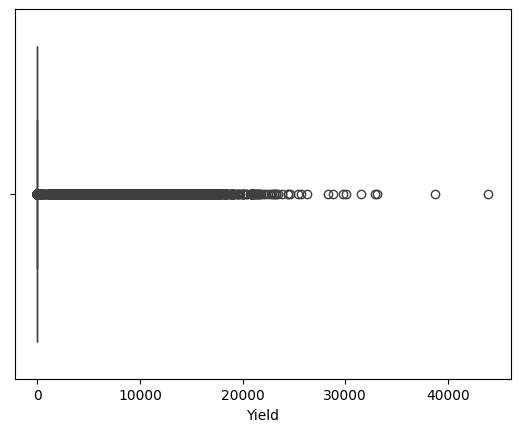

In [8]:
# Looking throungh Boxplot

sns.boxplot(x = 'Yield', data = df)
plt.show()

In [9]:
# By using Quantile Method Removing the Outlier

q1 = df['Yield'].quantile(0.25)
q3 = df['Yield'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR
new_df = df[df['Yield']<=max_range]
new_df.shape

(293832, 10)

# Analysis On crop Production

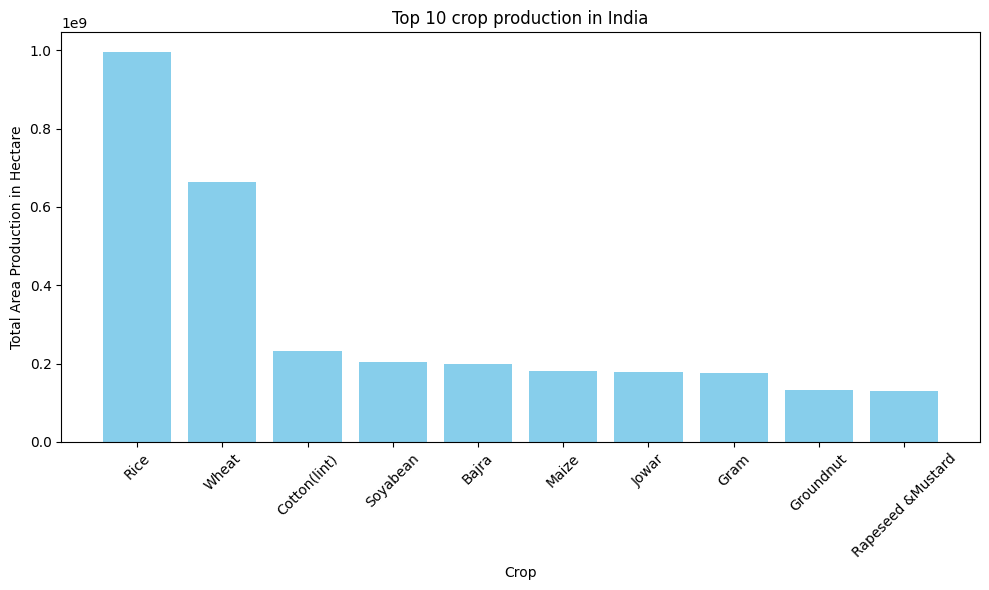

In [10]:
# Ploting the Bar Plot for top 10 Crop Production in India

df['Area'] = pd.to_numeric(df['Area'], errors = 'coerce')
crop_area = df.groupby('Crop')['Area'].sum().reset_index()
top_10_crop = crop_area.sort_values(by ='Area', ascending = False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_crop['Crop'], top_10_crop['Area'], color = 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Production in Hectare')
plt.title('Top 10 crop production in India')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

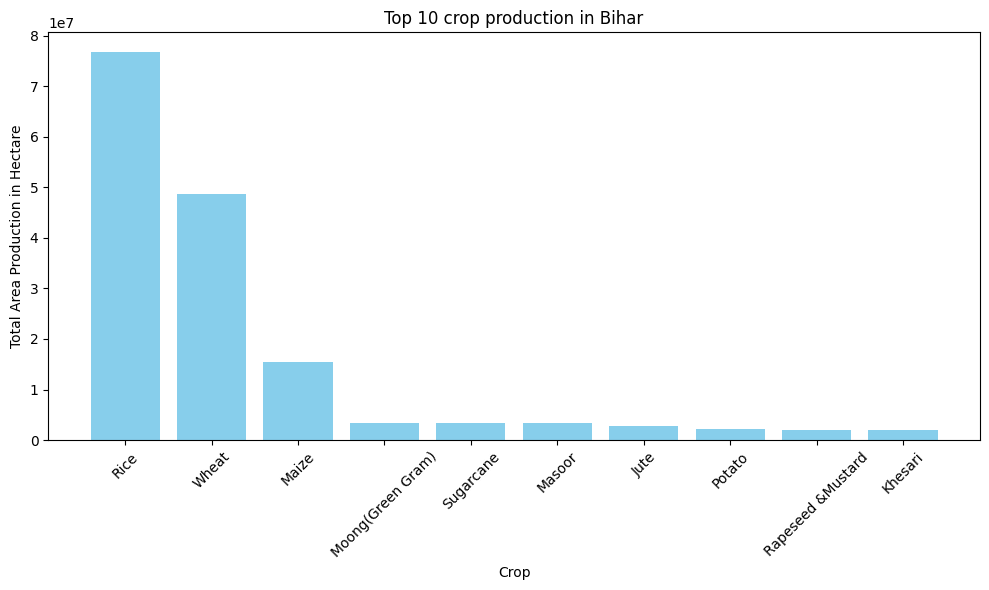

In [11]:
# Ploting the Bar Graph for top 10 crop produces in Bihar

df_bihar = df[df['State'] == 'Bihar']
df_bihar.loc[:, 'Area'] = pd.to_numeric(df_bihar['Area'], errors='coerce')
crop_area = df_bihar.groupby('Crop')['Area'].sum().reset_index()
top_10_crop = crop_area.sort_values(by ='Area', ascending = False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_crop['Crop'], top_10_crop['Area'], color = 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Production in Hectare')
plt.title('Top 10 crop production in Bihar')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

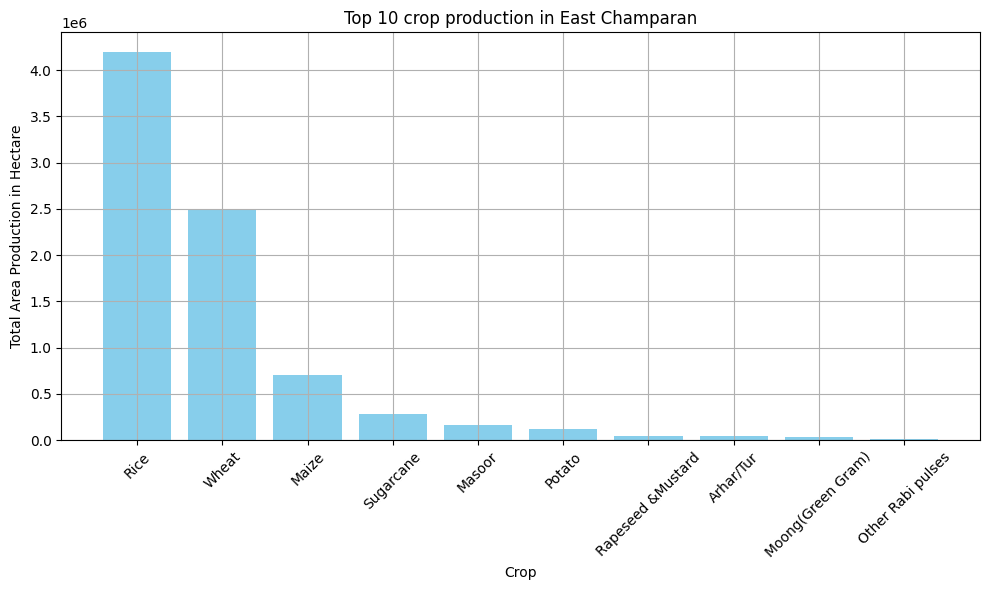

In [12]:
# Ploting the Bar Graph for top 10 crop produce in East Champaran

df_ec = df[(df['State'] == 'Bihar') & (df['District'] == 'PURBI CHAMPARAN')]
df_ec.loc[:,'Area'] = pd.to_numeric(df['Area'], errors = 'coerce')
crop_area = df_ec.groupby('Crop')['Area'].sum().reset_index()
top_10_crop = crop_area.sort_values(by ='Area', ascending = False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_crop['Crop'], top_10_crop['Area'], color = 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Production in Hectare')
plt.title('Top 10 crop production in East Champaran')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Determining Top Crop Produces by each State

In [13]:
# Detarning the top crop produces by the east state along with their production.

df = pd.read_csv('India_Agriculture_Crop_Production.csv')
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
df['Production(Million KG)'] = df['Production']/10**3
idx = df.groupby('State')['Production(Million KG)'].transform('max') == df['Production(Million KG)']
top_crops = df[idx]

# Select relevant columns for output
top_crops = top_crops[['State', 'Crop', 'Production(Million KG)']]

# Display the results
pd.DataFrame(top_crops)

,State,Crop,Production(Million KG)
10692,Dadra and Nagar Haveli,Sugarcane,1.229600e+02
10748,Goa,Coconut,1.251200e+05
14553,Jharkhand,Rice,5.095690e+02
54307,Gujarat,Sugarcane,1.175400e+04
55479,Haryana,Sugarcane,2.894000e+03
69233,Nagaland,Sugarcane,1.601000e+02
83541,West Bengal,Coconut,7.509500e+04
87440,Arunachal Pradesh,Rice,3.501000e+01
115343,Puducherry,Coconut,2.201200e+04
119396,Tamil Nadu,Coconut,1.597800e+06


In [14]:
# Looking for top 3 rows of our Dataset

df.head(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Production(Million KG)
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,2.061
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,2.083
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1.525


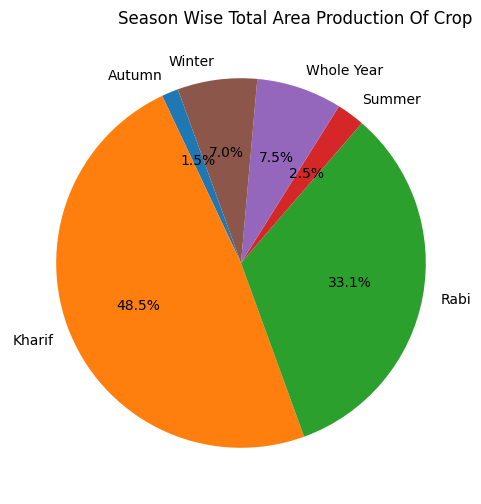

In [15]:
# Ploting the Pie-Chart for Season wise total production of the crop.

plt.figure(figsize=(6,6))
swp = df.groupby('Season')["Area"].sum()
plt.pie(swp, labels = swp.index , autopct ='%1.1f%%', startangle=110 )
plt.title("Season Wise Total Area Production Of Crop", loc = 'right')
plt.show()

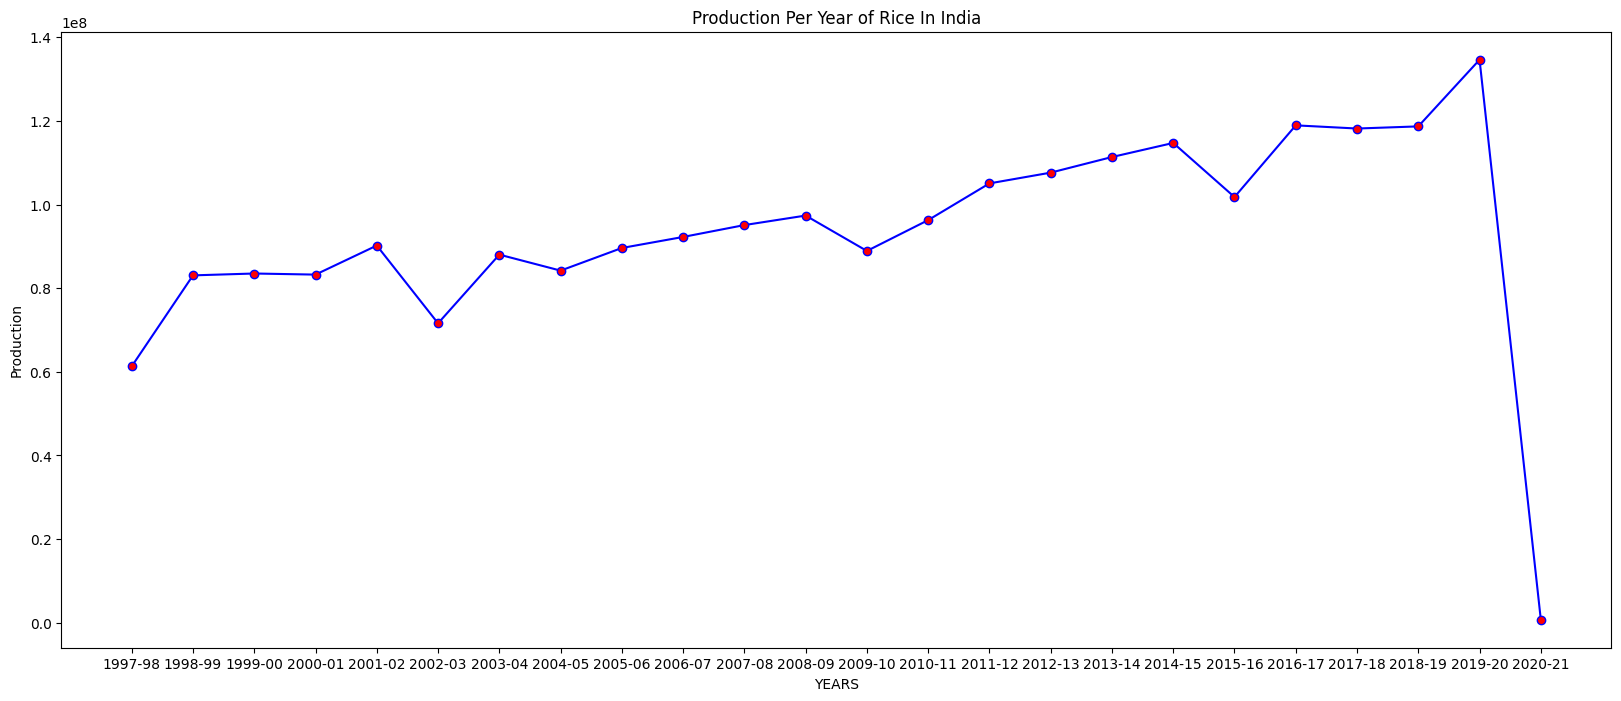

In [16]:
# Ploting the Line Graph of Rice production in India

filtered_data = df[(df['Crop'] == 'Rice')]
fil_data = filtered_data.groupby('Year')['Production'].sum().reset_index()
# fil_data = pd.DataFrame(fil_data)
plt.figure(figsize=(20,8))
plt.xlabel('YEARS')
plt.ylabel('Production')
plt.title('Production Per Year of Rice In India')
plt.plot(fil_data['Year'],fil_data['Production'],marker = 'o',mfc = 'red' ,color = 'b')
plt.show()

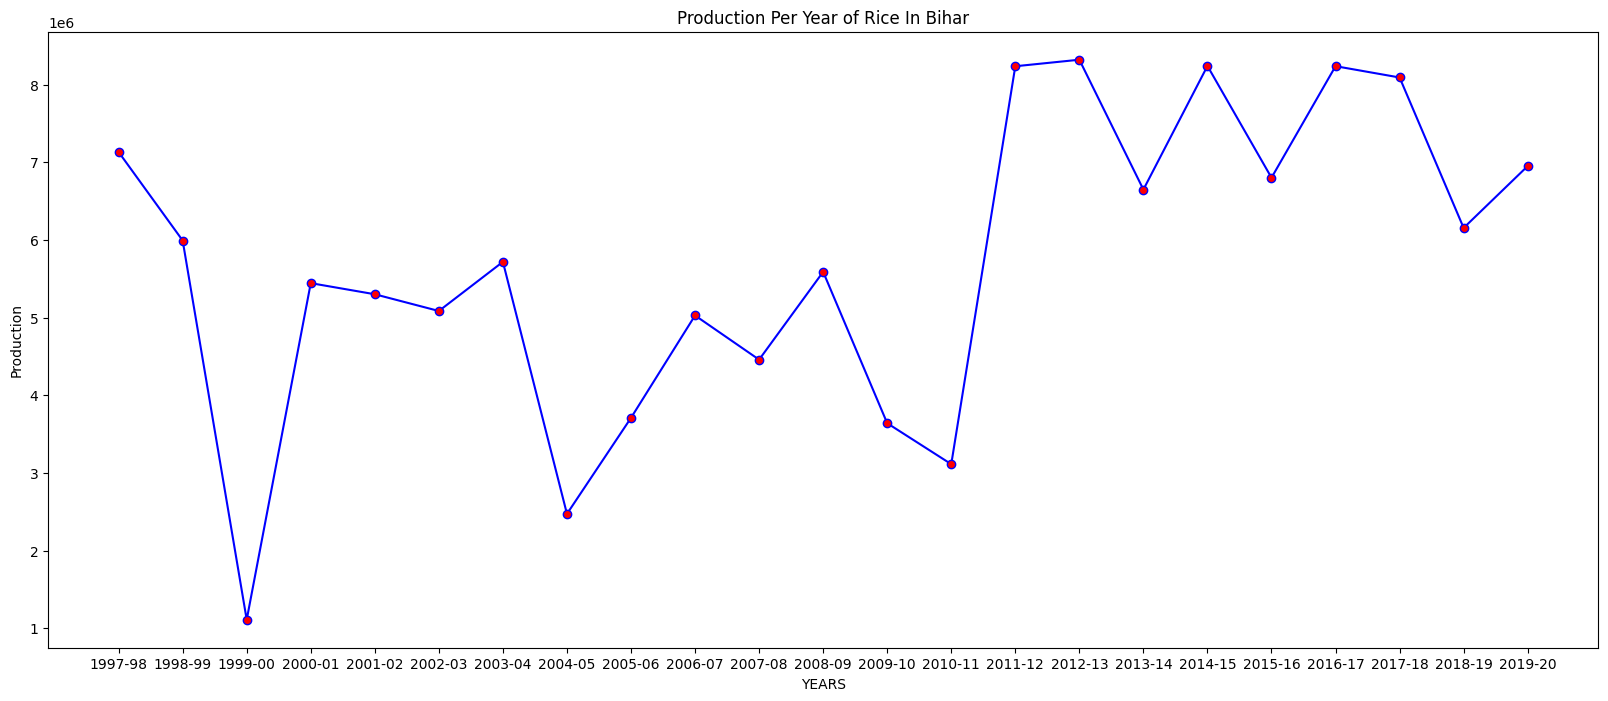

In [17]:
# Ploting the Line Graph of Rice production in Bihar

filtered_data = df[(df['Crop'] == 'Rice') & (df['State'] == 'Bihar')]
fil_data = filtered_data.groupby('Year')['Production'].sum().reset_index()
# fil_data = pd.DataFrame(fil_data)
plt.figure(figsize=(20,8))
plt.xlabel('YEARS')
plt.ylabel('Production')
plt.title('Production Per Year of Rice In Bihar')
plt.plot(fil_data['Year'],fil_data['Production'],marker = 'o',mfc = 'red' ,color = 'b')
plt.show()

<BarContainer object of 23 artists>

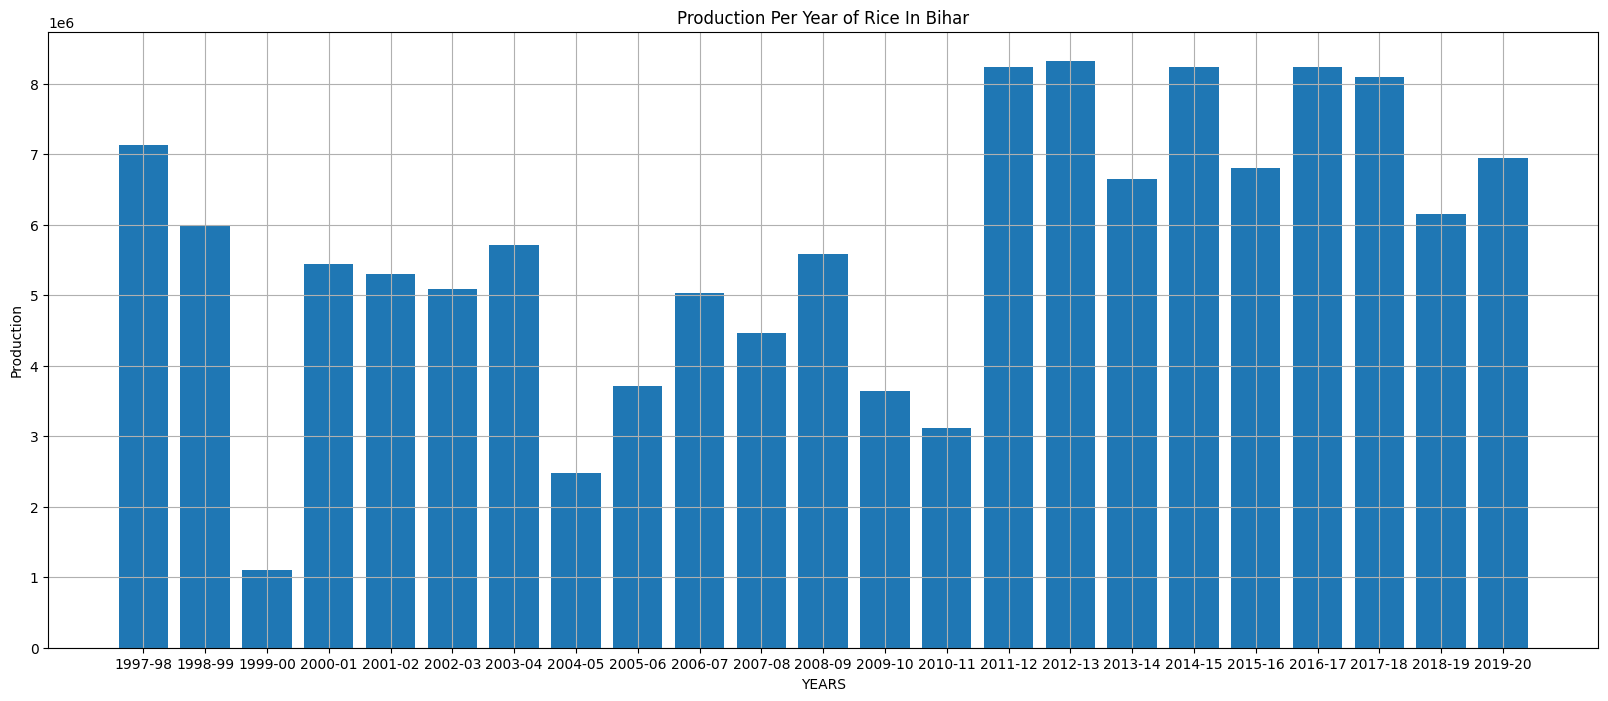

In [18]:
# Ploting the same in Bar Graph

filtered_data = df[(df['Crop'] == 'Rice') & (df['State'] == 'Bihar')]
fil_data = filtered_data.groupby('Year')['Production'].sum().reset_index()
# fil_data = pd.DataFrame(fil_data)
plt.figure(figsize=(20,8))
plt.xlabel('YEARS')
plt.ylabel('Production')
plt.title('Production Per Year of Rice In Bihar')
plt.grid(True)
plt.bar(fil_data['Year'],fil_data['Production'])

# Production Pridiction By Using Random Forest Model(Machine Learning)

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('India_Agriculture_Crop_Production.csv')

In [21]:
df.head(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358


In [22]:
df['Area Units'].value_counts()

Area Units
Hectare    345407
Name: count, dtype: int64

In [23]:
df = df.drop(columns = 'Area Units')

In [24]:
df = df.rename(columns = {'Area' : 'Area(Hectare)'})
df.head(3)

,State,District,Crop,Year,Season,Area(Hectare),Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,Tonnes,1.209358


In [25]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area(Hectare)         33
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [26]:
df['Crop'] = df['Crop'].fillna(df['Crop'].mode()[0])
df['Season'] = df['Season'].fillna(df['Season'].mode()[0])
df['Area(Hectare)'] = df['Area(Hectare)'].fillna(df['Area(Hectare)'].mean())
df['Production'] = df['Production'].fillna(df['Production'].mean())


In [27]:
df.head(3)

,State,District,Crop,Year,Season,Area(Hectare),Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,Tonnes,1.209358


In [28]:
df.isnull().sum()

State                0
District             0
Crop                 0
Year                 0
Season               0
Area(Hectare)        0
Production           0
Production Units     0
Yield               33
dtype: int64

In [29]:
df['Production Units'].value_counts()

Production Units
Tonnes    331686
Bales      10794
Nuts        2927
Name: count, dtype: int64

In [30]:
df = df[df['Production Units'] == 'Tonnes']

In [31]:
level_encoders = {}
categorical_feature = ['State','District','Crop','Year','Season']

In [32]:
from sklearn.preprocessing import LabelEncoder

for feature in categorical_feature:
    level_encoders[feature] = LabelEncoder()
    df[feature] = level_encoders[feature].fit_transform(df[feature])

In [33]:
df.isnull().sum()

State                0
District             0
Crop                 0
Year                 0
Season               0
Area(Hectare)        0
Production           0
Production Units     0
Yield               33
dtype: int64

In [34]:
x = df.iloc[:,:-3]
y = df['Production']

In [35]:
y

0           2061.000000
1           2083.000000
2           1525.000000
3           5239.000000
4           5267.000000
              ...      
345402    958371.148664
345403    958371.148664
345404    958371.148664
345405    958371.148664
345406    958371.148664
Name: Production, Length: 331686, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=.3, random_state=42)

In [37]:
y_train

128759     131.0
328731    1920.0
134128     564.0
23210      600.0
66910      400.0
           ...  
124885      70.0
269972       2.0
137636    3634.0
153123    3831.0
126964     729.0
Name: Production, Length: 232180, dtype: float64

In [38]:
X_test

,State,District,Crop,Year,Season,Area(Hectare)
122377,33,14,12,12,1,72.0
160026,24,440,24,13,1,20.0
136042,4,355,18,14,1,565.0
323269,20,469,29,1,1,100.0
170685,33,14,24,15,1,6.0
...,...,...,...,...,...,...
97065,11,473,43,10,4,4500.0
9097,6,167,13,5,4,1.0
53983,11,284,30,8,1,400.0
11533,11,348,24,4,1,1800.0


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
# Checking our model accuracy..

rf.score(X_train,y_train)*100, rf.score(X_test,y_test)*100

(99.12050028976942, 93.31315690322371)

In [41]:
# Prediction for Random Input

data = pd.DataFrame({
    'State' : ['Bihar'],
    'District' : ['PURBI CHAMPARAN'],
    'Crop' : ['Rice'],
    'Year' : ['2001-02'],
    'Season' : ['Summer'],
    'Area(Hectare)' :[413]
})


In [42]:
for feature in categorical_feature:
    data[feature] = level_encoders[feature].transform(data[feature])

In [43]:
print('the total production(Hectare) =', rf.predict(data)[0])

the total production(Hectare) = 693.58


In [45]:
print('The Percentage Yeild is = ', rf.predict(data)[0]/data['Area(Hectare)'][0])

The Percentage Yeild is =  1.6793704600484263
